## Diabetes Prediction System

In [1]:
# Imported required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ignore warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
data = pd.read_csv('Diabetes Data.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Exploratory Data Analysis

Displaying comprehensive information about the dataset

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [5]:
print(data.axes)

[RangeIndex(start=0, stop=768, step=1), Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')]


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [9]:
print(data.index)

RangeIndex(start=0, stop=768, step=1)


In [10]:
print(data.shape)

(768, 9)


In [11]:
print(data.size)

6912


Finding missing values in the dataset using isnull() function

In [12]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [13]:
data.notnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True,True,True


In [14]:
print(data.isnull().all())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [15]:
print(data.notnull().all())

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
dtype: bool


In [16]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [17]:
print(data.notnull().sum())

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


Displaying the transposed summary statistics for numerical columns in the dataset

In [18]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Creating a deep copy of the dataset and replacing zero values in selected columns with NaN

In [19]:
data_dp_copy = data.copy(deep=True)
data_dp_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data_dp_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Note: Preganicies column is not included in the replacement as it may have valid zero values
# Becuase diabetes prediction system for both Male and Female.

In [20]:
print(data_dp_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [21]:
print(data_dp_copy.notnull().sum())

Pregnancies                 768
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64


## Data Visualization

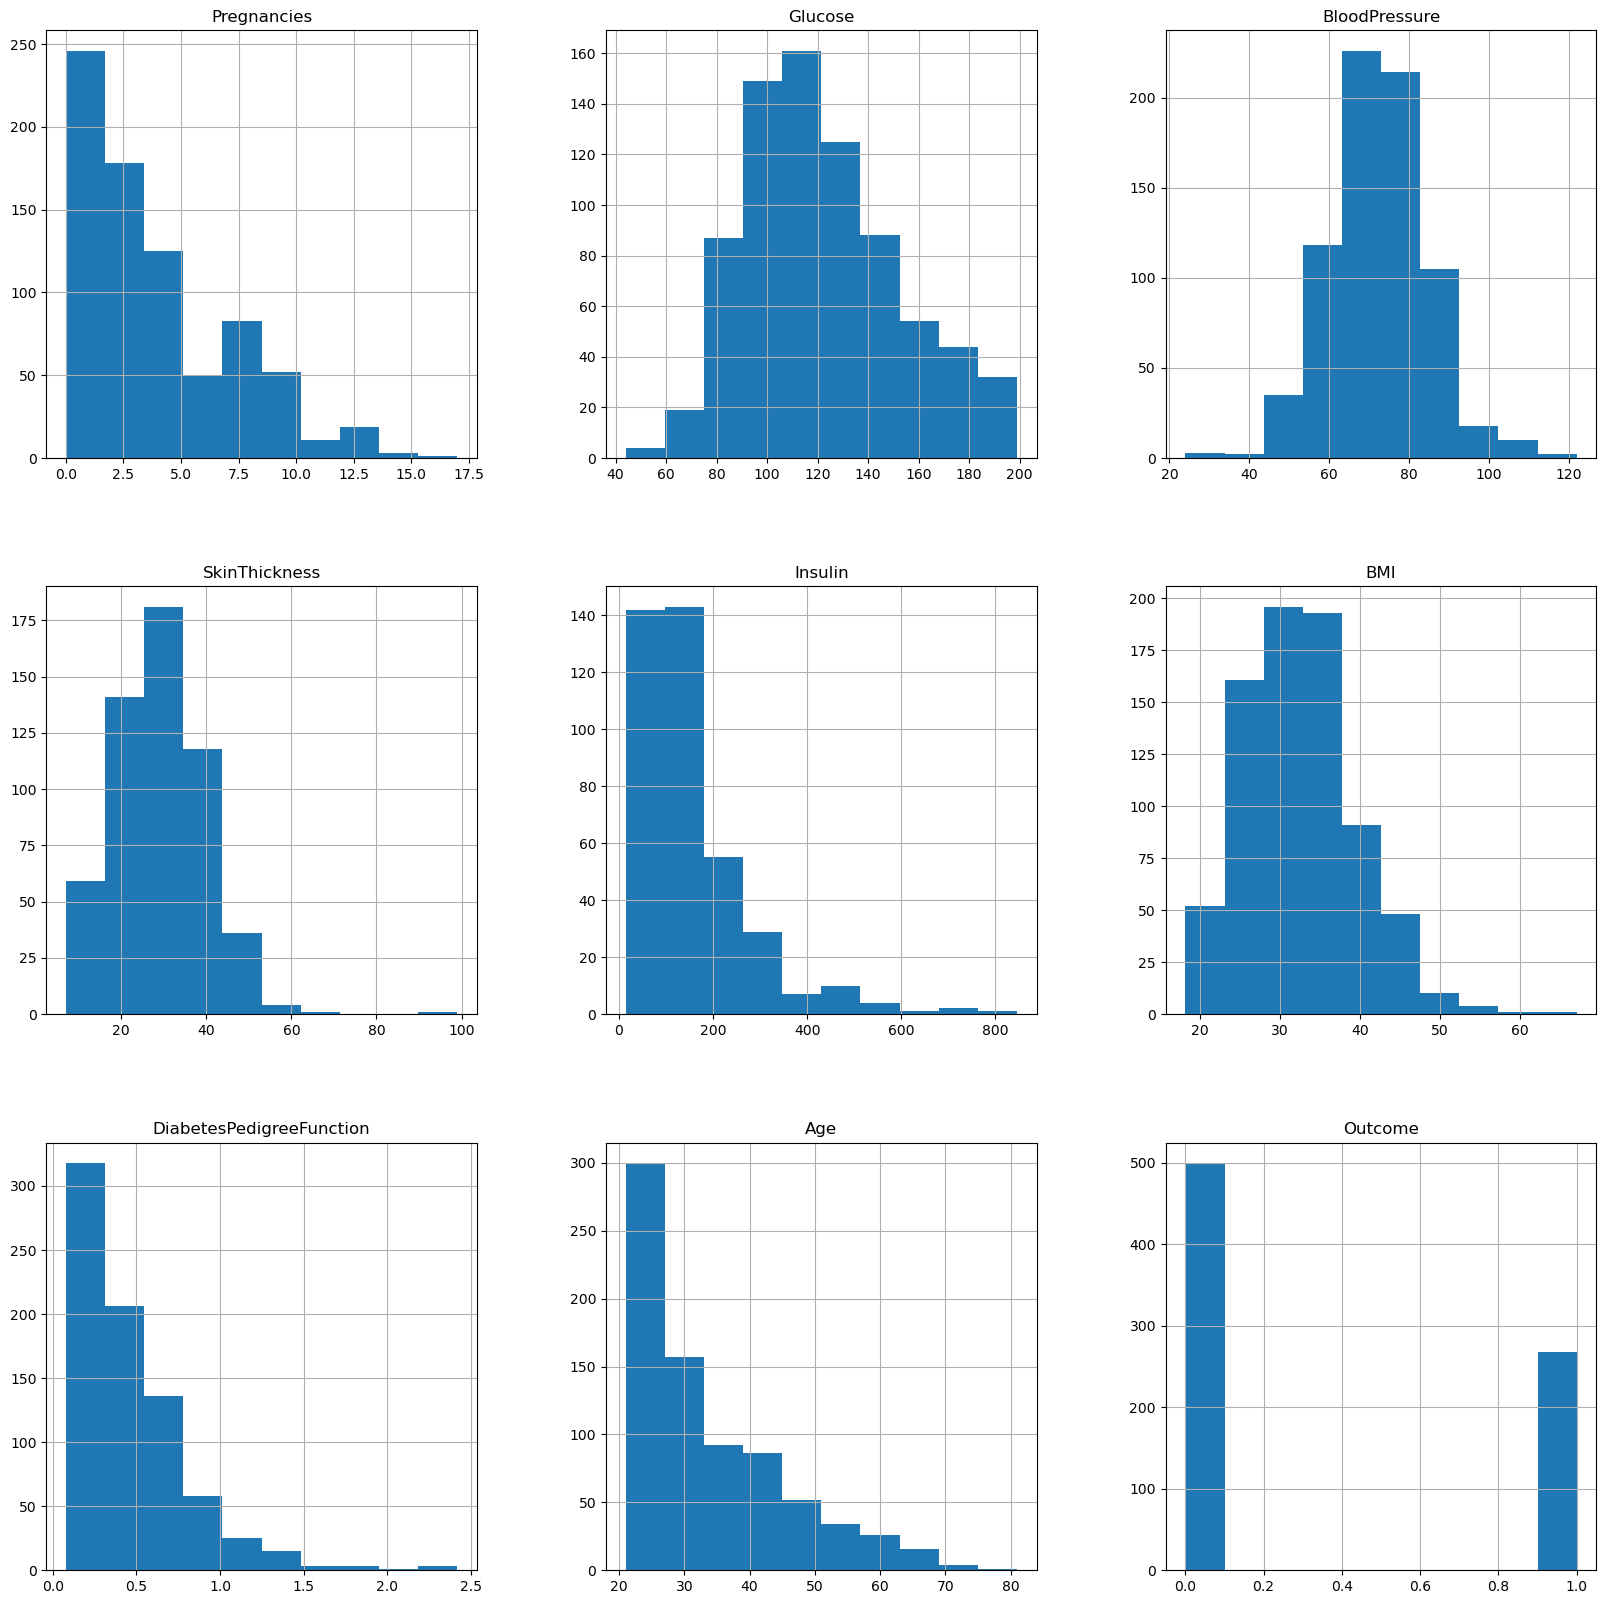

In [23]:
dv = data_dp_copy.hist(figsize=(20,20))

Filling NaN values with mean for specific columns in the dataset

In [24]:
data_dp_copy['Glucose'].fillna(data_dp_copy['Glucose'].mean(), inplace=True)
data_dp_copy['BloodPressure'].fillna(data_dp_copy['BloodPressure'].mean(), inplace=True)
data_dp_copy['SkinThickness'].fillna(data_dp_copy['SkinThickness'].mean(), inplace=True)
data_dp_copy['Insulin'].fillna(data_dp_copy['Insulin'].mean(), inplace=True)
data_dp_copy['BMI'].fillna(data_dp_copy['BMI'].mean(), inplace=True)

In [25]:
print(data_dp_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


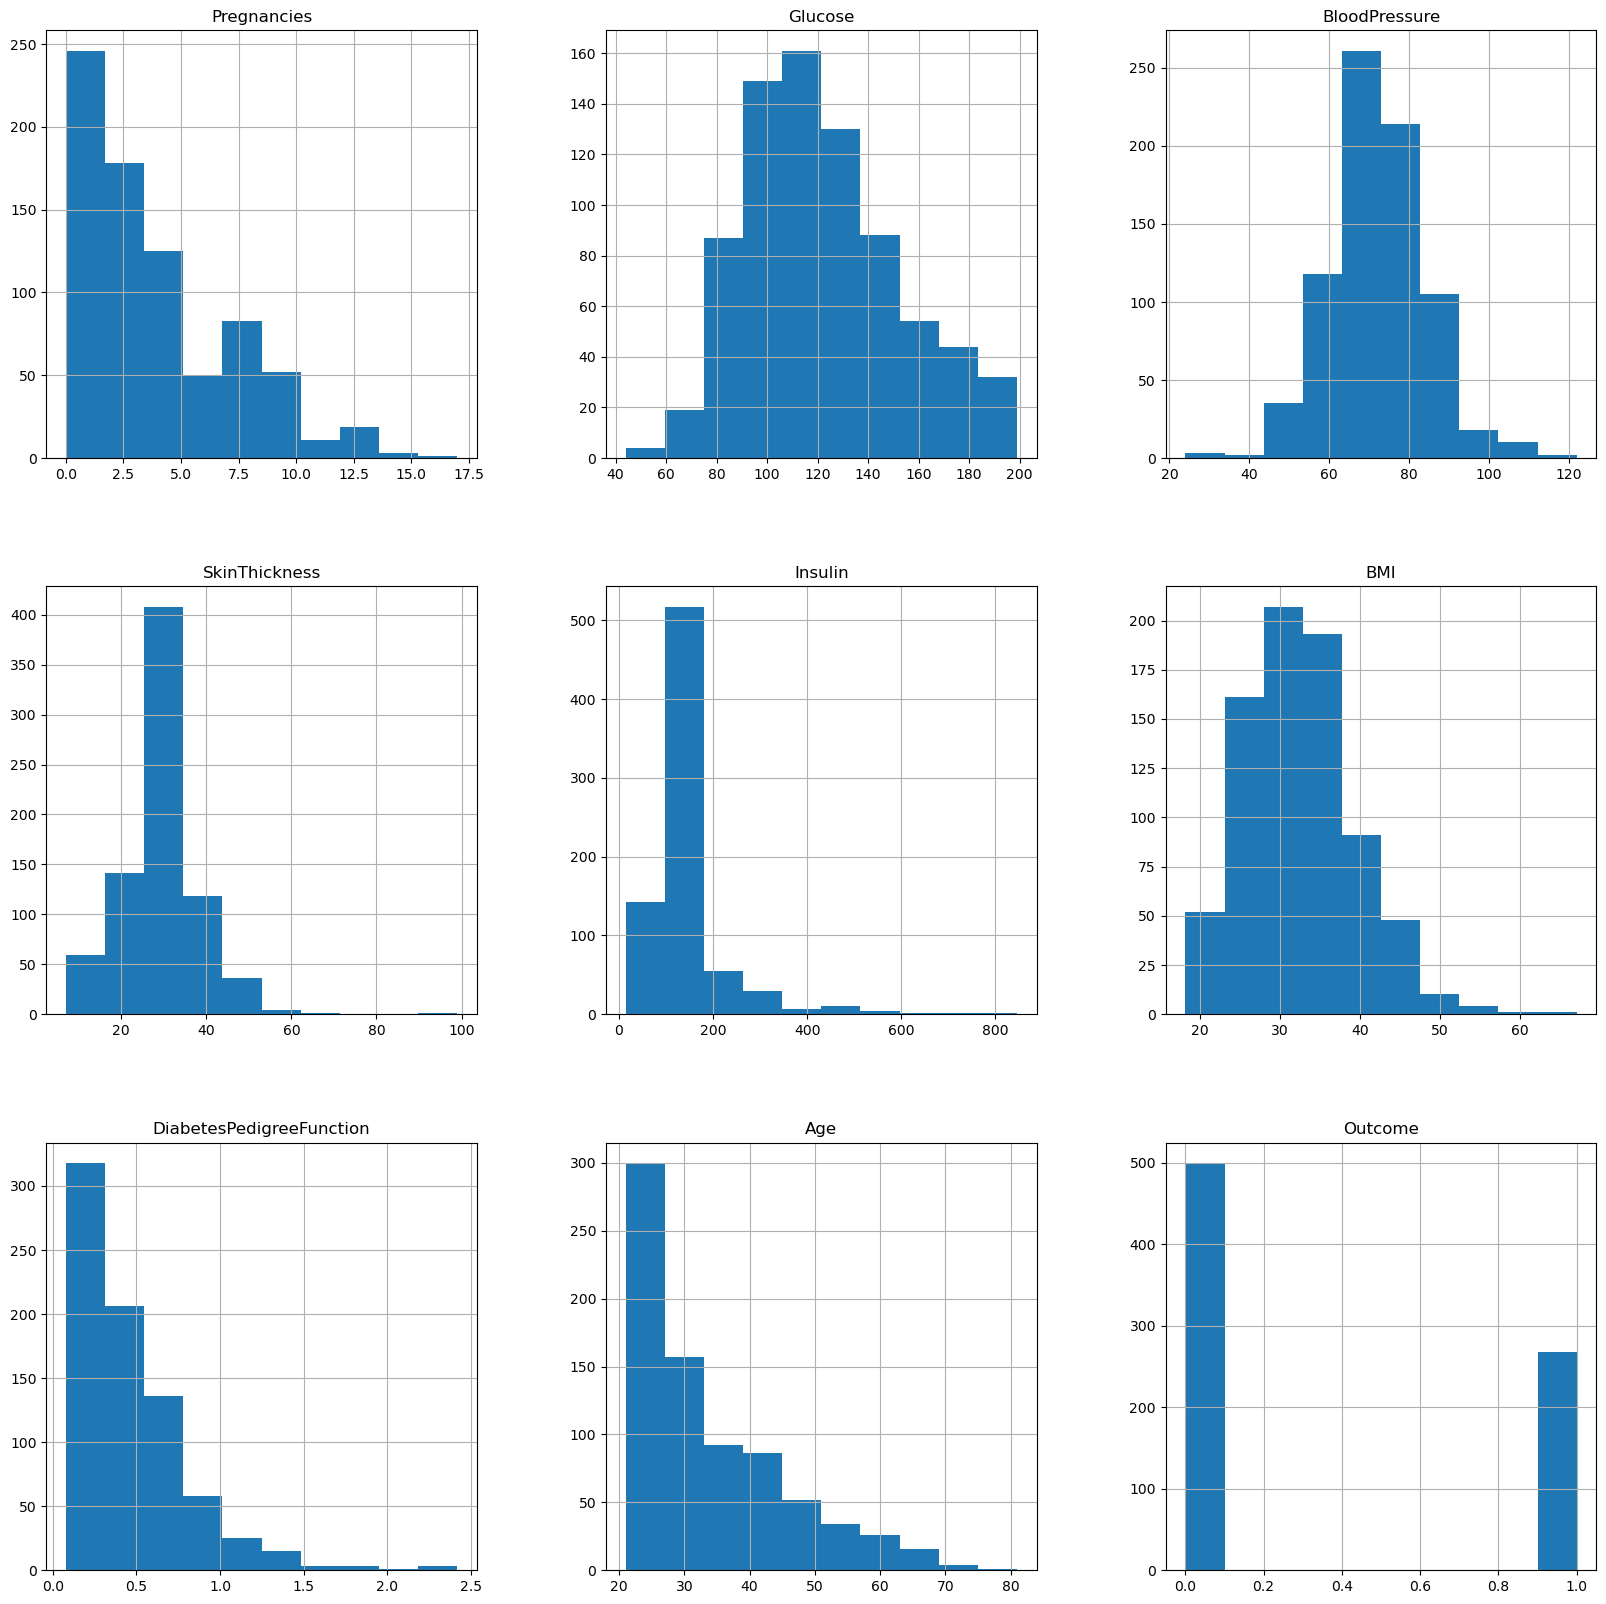

In [26]:
data_dp_copy.hist(figsize=(20, 20))
plt.show()

Creating histograms for all columns in the dataset, with added vertical lines representing Mean and Median

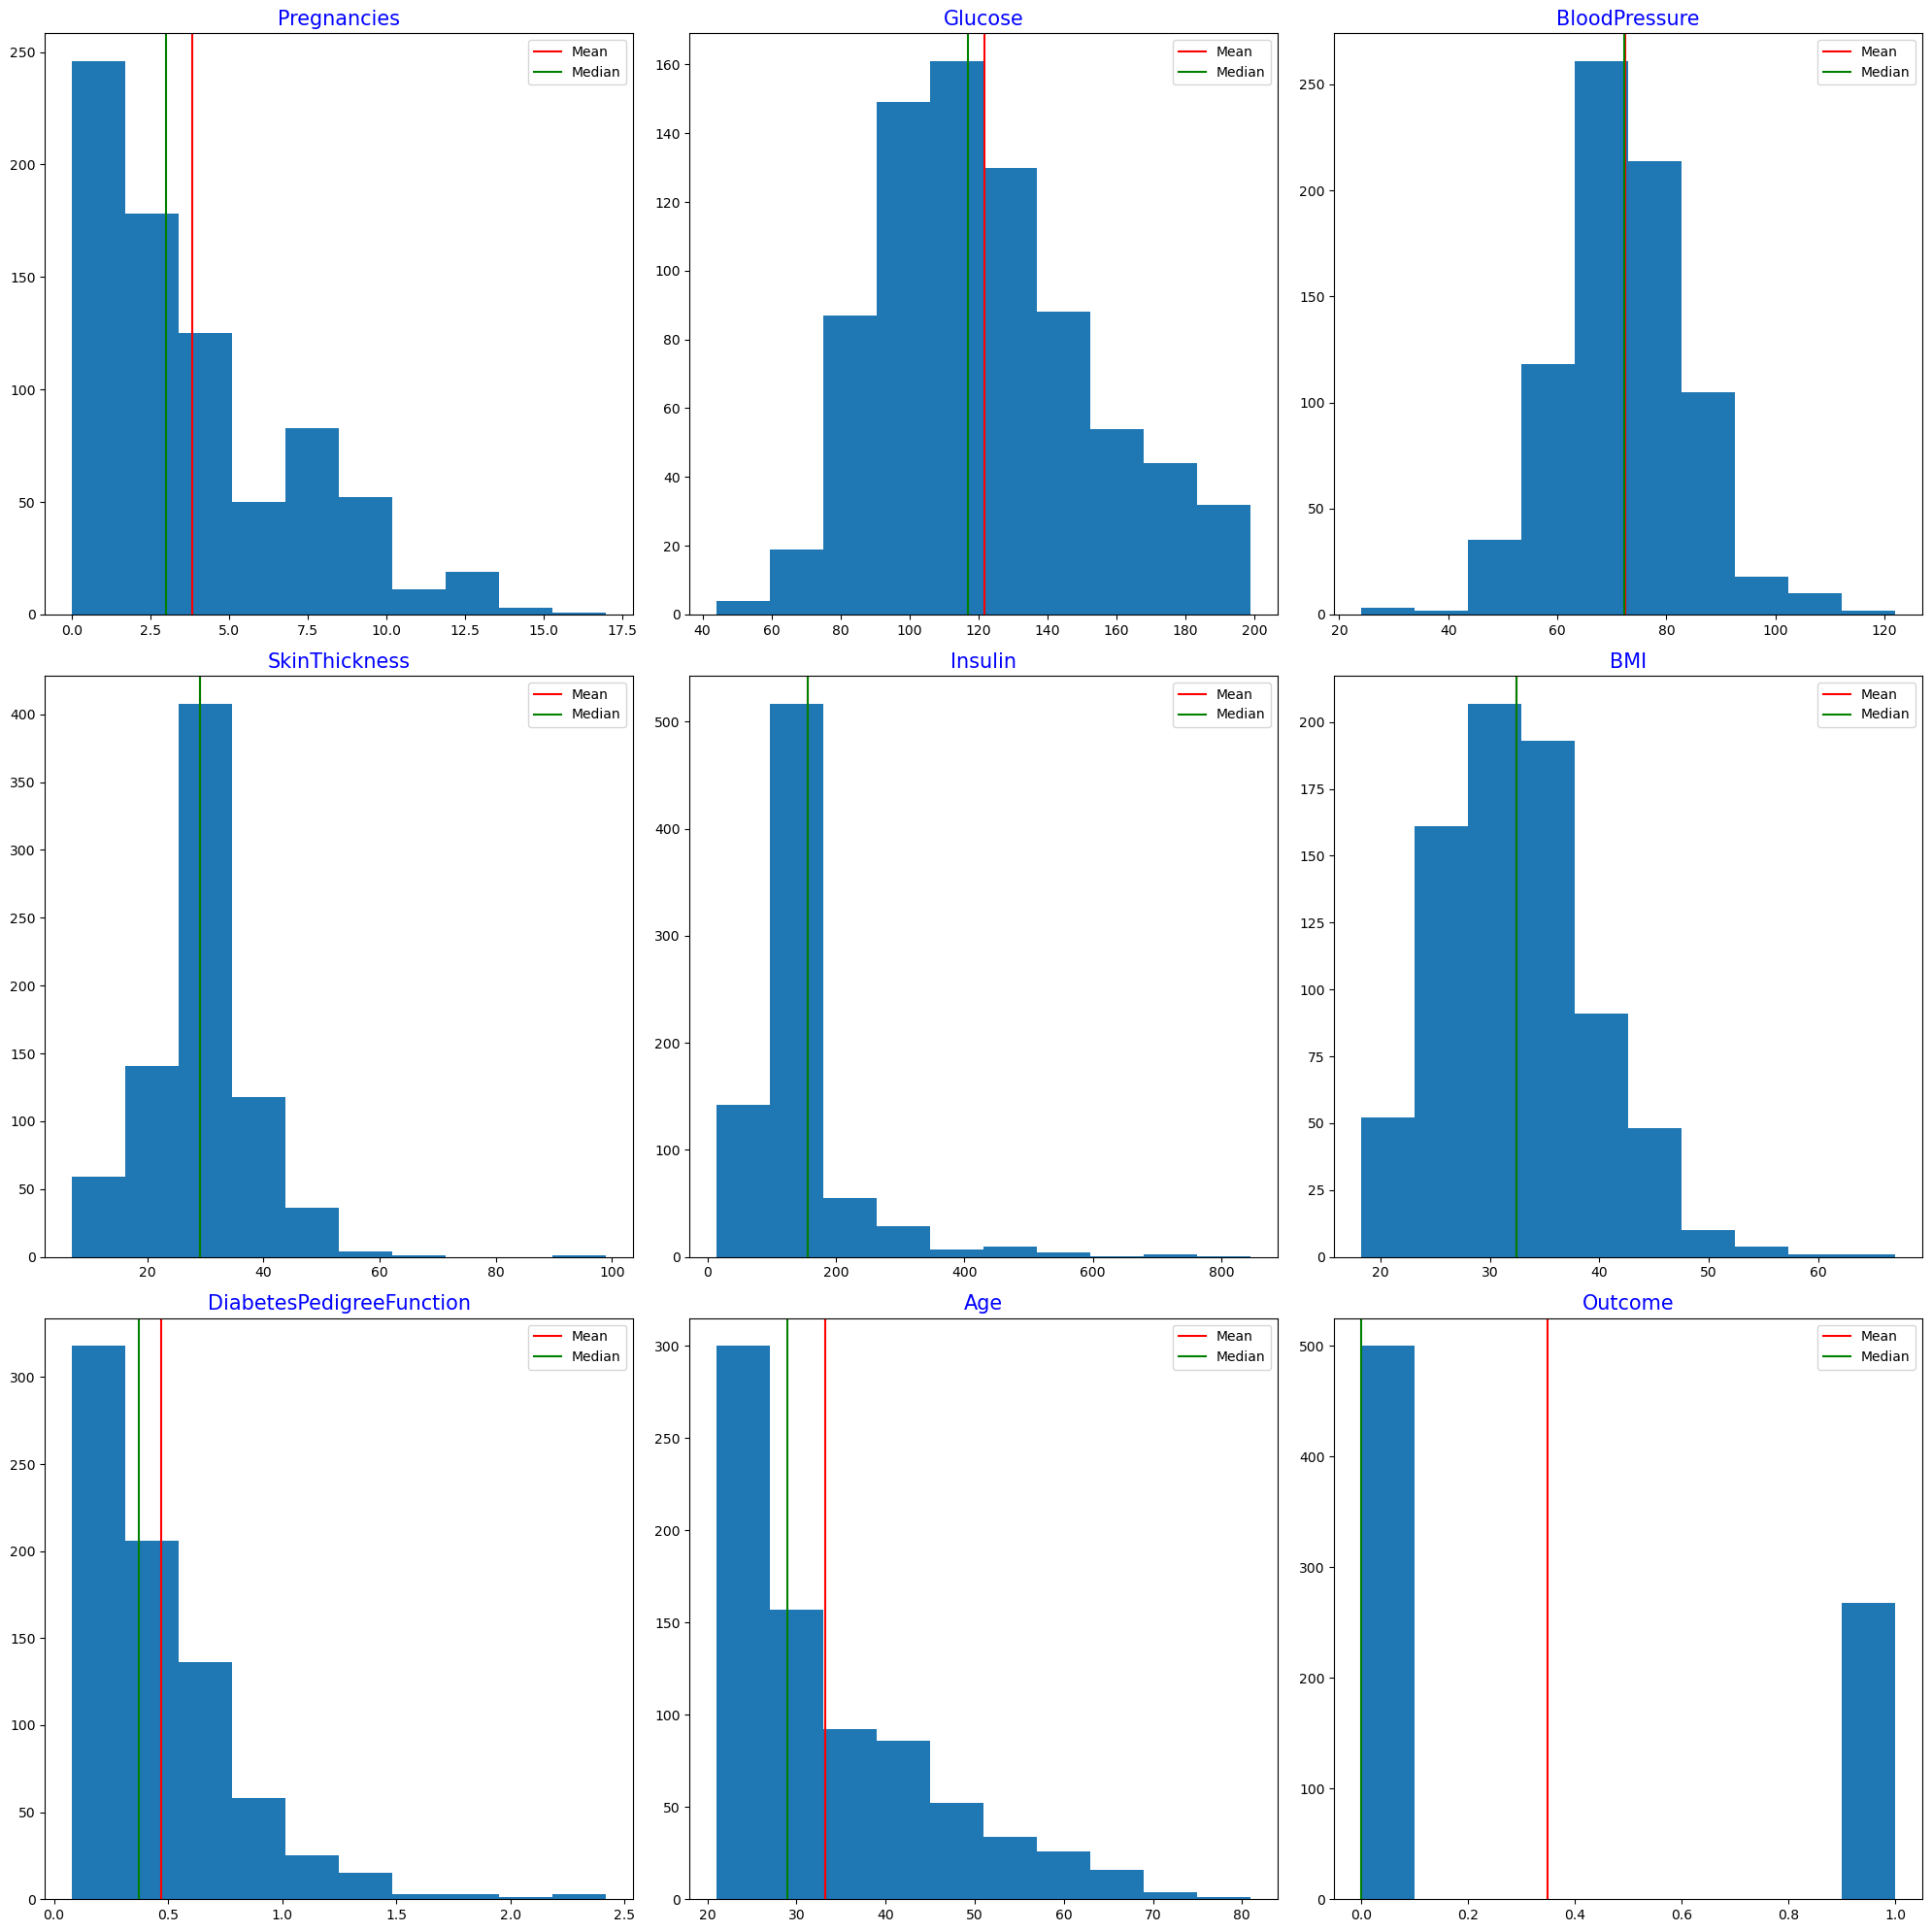

In [27]:
plt.figure(figsize=(20,20))  # Adjust the figure size as needed

plt.subplot(3, 3, 1)  # Subplot for 'Pregnancies'
plt.hist(data_dp_copy['Pregnancies'])
plt.axvline(data_dp_copy['Pregnancies'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['Pregnancies'].median(), color='green', label="Median")
plt.title('Pregnancies', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 2)  # Subplot for 'Glucose'
plt.hist(data_dp_copy['Glucose'])
plt.axvline(data_dp_copy['Glucose'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['Glucose'].median(), color='green', label="Median")
plt.title('Glucose', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 3)  # Subplot for 'BloodPressure'
plt.hist(data_dp_copy['BloodPressure'])
plt.axvline(data_dp_copy['BloodPressure'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['BloodPressure'].median(), color='green', label="Median")
plt.title('BloodPressure', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 4) # Subplot for 'SkinThickness'
plt.hist(data_dp_copy['SkinThickness'])
plt.axvline(data_dp_copy['SkinThickness'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['SkinThickness'].median(), color='green', label="Median")
plt.title('SkinThickness', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 5) # Subplot for 'Insulin'
plt.hist(data_dp_copy['Insulin'])
plt.axvline(data_dp_copy['Insulin'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['Insulin'].median(), color='green', label="Median")
plt.title('Insulin', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 6) # Subplot for 'BMI'
plt.hist(data_dp_copy['BMI'])
plt.axvline(data_dp_copy['BMI'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['BMI'].median(), color='green', label="Median")
plt.title('BMI', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 7) # Subplot for 'DiabetesPedigreeFunction'
plt.hist(data_dp_copy['DiabetesPedigreeFunction'])
plt.axvline(data_dp_copy['DiabetesPedigreeFunction'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['DiabetesPedigreeFunction'].median(), color='green', label="Median")
plt.title('DiabetesPedigreeFunction', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 8) # Subplot for 'Age'
plt.hist(data_dp_copy['Age'])
plt.axvline(data_dp_copy['Age'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['Age'].median(), color='green', label="Median")
plt.title('Age', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

plt.subplot(3, 3, 9) # Subplot for 'Outcome'
plt.hist(data_dp_copy['Outcome'])
plt.axvline(data_dp_copy['Outcome'].mean(), color='red', label='Mean')
plt.axvline(data_dp_copy['Outcome'].median(), color='green', label="Median")
plt.title('Outcome', fontdict={'color':'blue', 'fontsize':15})
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()

Counting the occurrences of each unique value in the 'Outcome' column

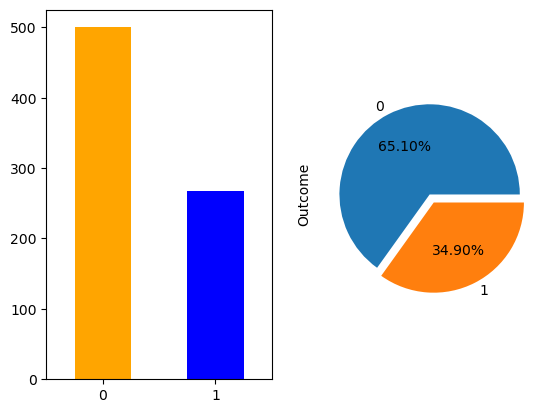

In [28]:
outcome_counts = data_dp_copy['Outcome'].value_counts()

# Displaying the counts in a bar plot
plt.subplot(1,2,1)
color={'orange', 'blue'}
outcome_plot = outcome_counts.plot(kind='bar', color=color)
outcome_plot.set_xticklabels(outcome_plot.get_xticklabels(), rotation=0)

plt.subplot(1,2,2)
labels = {'1', '0'}
outcome_plot = outcome_counts.plot(kind='pie', autopct='%1.2f%%', explode=[0, 0.1], labels=labels)
plt.show()

## Feature Engineering

Creating a new categorical column 'NewBMI' based on BMI values

In [29]:
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype='category')

data_dp_copy['NewBMI'] = NewBMI
data_dp_copy.loc[data_dp_copy['BMI'] < 18.5, "NewBMI"] = NewBMI[0]
data_dp_copy.loc[(data_dp_copy['BMI'] > 18.5) & (data_dp_copy['BMI'] <= 24.9), 'NewBMI'] = NewBMI[1]
data_dp_copy.loc[(data_dp_copy['BMI'] > 24.9) & (data_dp_copy['BMI'] <= 29.9), 'NewBMI'] = NewBMI[2]
data_dp_copy.loc[(data_dp_copy['BMI'] > 29.9) & (data_dp_copy['BMI'] <= 34.9), 'NewBMI'] = NewBMI[3]
data_dp_copy.loc[(data_dp_copy['BMI'] > 34.9) & (data_dp_copy['BMI'] <= 39.9), 'NewBMI'] = NewBMI[4]
data_dp_copy.loc[data_dp_copy['BMI'] > 39.9, 'NewBMI'] = NewBMI[5]

In [30]:
print(data_dp_copy['NewBMI'].value_counts())

Obesity 1      235
Overweight     179
Obesity 2      150
Normal         102
Obesity 3       98
Underweight      4
Name: NewBMI, dtype: int64


Function to categorize 'Insulin' values as 'Normal' or 'Abnormal'

In [31]:
def set_Insulin(row):
    if row['Insulin'] >= 16 and row['Insulin'] <= 166:
        return 'Normal'
    else:
        return 'Abnormal'

In [32]:
data_dp_copy = data_dp_copy.assign(NewInsulin=data_dp_copy.apply(set_Insulin, axis=1))

In [33]:
print(data_dp_copy['NewInsulin'].value_counts())

Normal      634
Abnormal    134
Name: NewInsulin, dtype: int64


In [34]:
data_dp_copy # Deep Copy Dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulin
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1,Obesity 1,Normal
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1,Normal,Normal
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1,Obesity 3,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0,Obesity 1,Abnormal
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0,Obesity 2,Normal
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0,Overweight,Normal
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1,Obesity 1,Normal


In [35]:
data # Original Dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Correlation between all the features

In [36]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

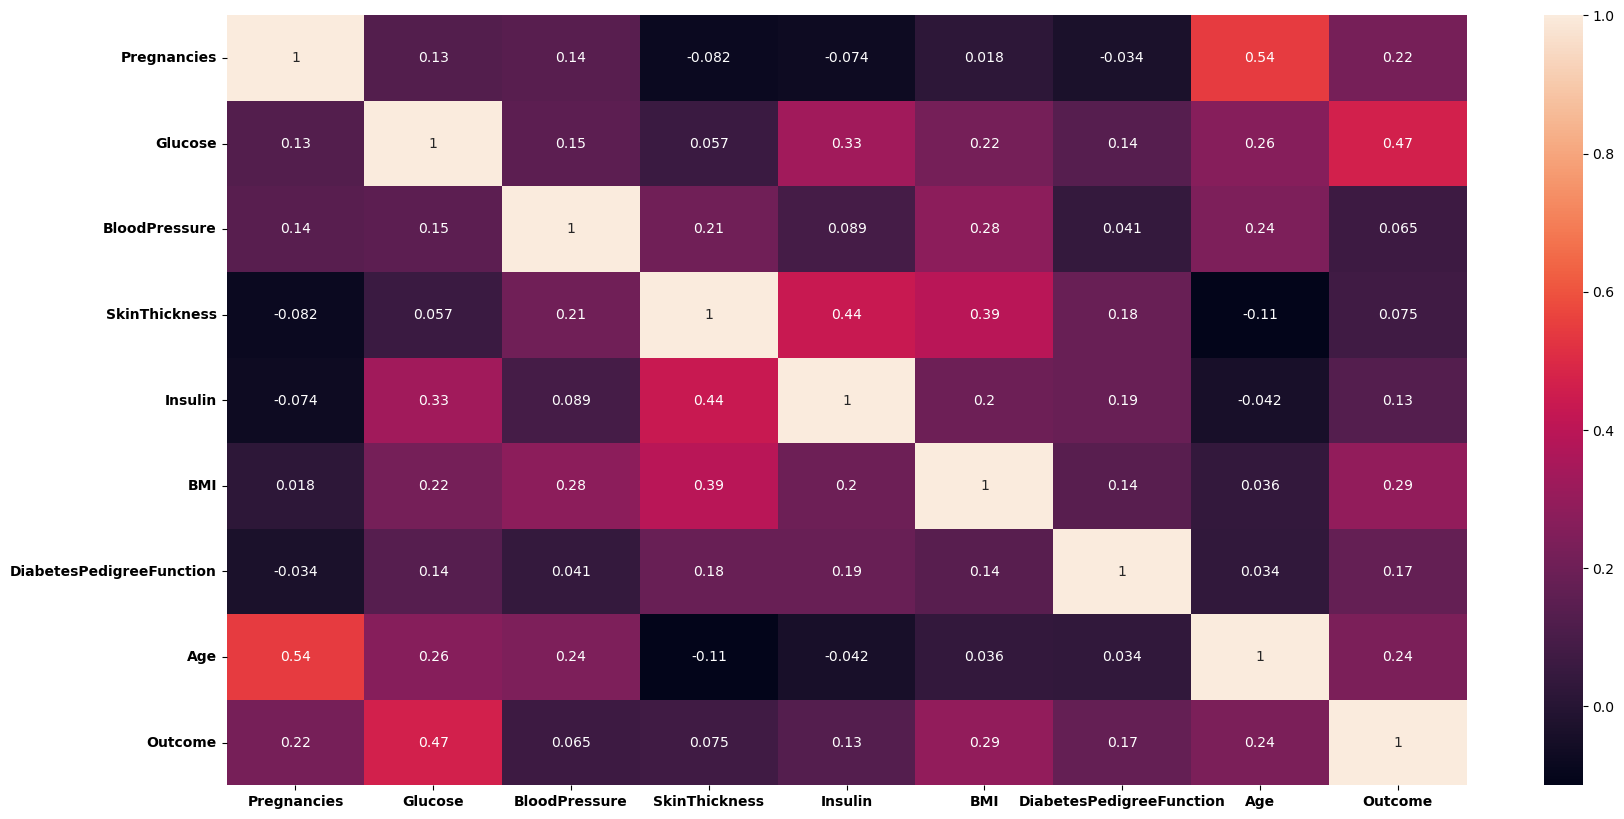

In [37]:
# Visualizating heatmap of multiple color based on the data
plt.figure(figsize=(20,10))

# It is replacing non-numeric characters
data_ = data.replace('[^\d.]','',regex=True).astype(float) 

# You can use this line also if you want to custmization with axis
# sns.heatmap(data_, cbar=True, xticklabels=True, yticklabels=True) 

sns.heatmap(data_.corr(), annot=True)
plt.xticks(rotation=0, fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.show

Training the model with the help of Train Test Split

In [38]:
# X: All the independent variables are stored
X = data.drop('Outcome', axis=1)  # Here, X contains all features except the 'Outcome' column.

# y: The dependent variable is stored
y = data['Outcome']  # Here, y contains the 'Outcome' column, which is the target variable.

Checking shapes for both Independent and Dependent variables

In [39]:
print("Shape of X:", X.shape)  # Displaying the shape of the independent variable X
print("Shape of y:", y.shape)  # Displaying the shape of the dependent variable y

Shape of X: (768, 8)
Shape of y: (768,)


Splitting the data into training and testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# I gave test_size of 0.2, indicating 20% of the data is used for testing and 80% for training.

# If I want to use a constant seed for reproducibility
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Displaying the shapes of the training and testing sets
print("Shape of X Train:", X_train.shape)
print("Shape of y Train:", y_train.shape)
print("Shape of X Test:", X_test.shape)
print("Shape of y Test:", y_test.shape)

Shape of X Train: (614, 8)
Shape of y Train: (614,)
Shape of X Test: (154, 8)
Shape of y Test: (154,)


In [42]:
# Displaying the independent variables from the 80% training set
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
498,7,195,70,33,145,25.1,0.163,55
100,1,163,72,0,0,39.0,1.222,33
550,1,116,70,28,0,27.4,0.204,21
108,3,83,58,31,18,34.3,0.336,25
578,10,133,68,0,0,27.0,0.245,36
...,...,...,...,...,...,...,...,...
724,1,111,94,0,0,32.8,0.265,45
55,1,73,50,10,0,23.0,0.248,21
670,6,165,68,26,168,33.6,0.631,49
584,8,124,76,24,600,28.7,0.687,52


In [43]:
# Displaying the independent variables from the 20% testing set
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
515,3,163,70,18,105,31.6,0.268,28
236,7,181,84,21,192,35.9,0.586,51
654,1,106,70,28,135,34.2,0.142,22
219,5,112,66,0,0,37.8,0.261,41
29,5,117,92,0,0,34.1,0.337,38
...,...,...,...,...,...,...,...,...
389,3,100,68,23,81,31.6,0.949,28
284,2,108,80,0,0,27.0,0.259,52
277,0,104,64,23,116,27.8,0.454,23
719,5,97,76,27,0,35.6,0.378,52


Training the Model

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Making Prediction

In [45]:
prediction = model.predict(X_test)
print(prediction)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0]


In [46]:
# Displaying the size of the predictions made on the testing set
prediction.size

154

In [47]:
# Displaying the shape of the predictions made on the testing set
prediction.shape

(154,)

Checking accuracy

In [48]:
accuracy = accuracy_score(prediction, y_test)
accuracy  # Displaying the accuracy on the testing set

0.7857142857142857

In [49]:
type(accuracy)

numpy.float64

In [50]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
